# Semana 2, Experimento 4 #
Código por Ricardo Rocha
<br>Experimento realizado por: Ricardo Rocha, Rafael Augustus, Cláudio Nascimento 

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import numpy as np
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [117]:
# Entrada de Dados
table_indexes = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
forces = [0.0489, 0.0978, 0.1467, 0.1956, 0.2445, 0.2934, 0.3423, 0.3912, 0.4401]
height_decreases = [0.015, 0.03, 0.043, 0.056, 0.068, 0.079, 0.089, 0.099, 0.108]
weights = [0.005, 0.01, 0.015, 0.020, 0.025, 0.030, 0.035, 0.040, 0.045]
width = 0.280
length = 0.0121
thickness = 0.0007

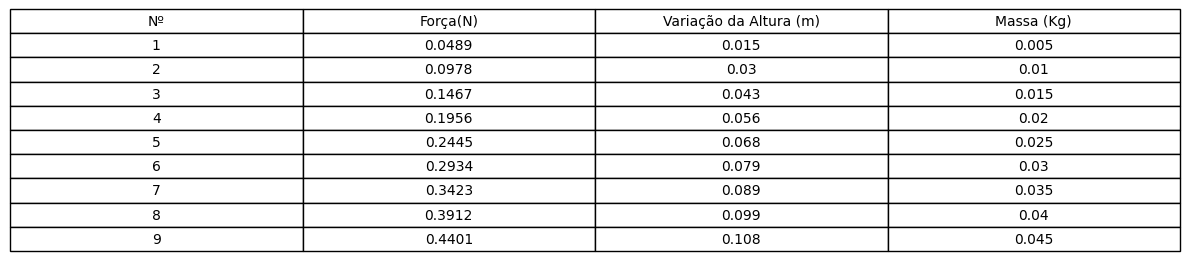

In [118]:
# Tabela de Dados
data = {
    "Nº": table_indexes,
    "Força(N)": forces,
    "Variação da Altura (m)": height_decreases,
    "Massa (Kg)": weights
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.tight_layout()
plt.show()

In [124]:
# Constante de flexão
bending_constants = []
for force, height in zip(forces, height_decreases):
    bending_constants.append(force/height)
    print(f"Constante de flexão: {round(force/height, 4)}")
average_bending_constant = round(statistics.mean(bending_constants), 4)
std_bending_constants = round(statistics.stdev(bending_constants), 4)
variance_bending_constants = round(statistics.variance(bending_constants), 4)
print(f"\nMédia da constante da flexão: {average_bending_constant}\nDesvio padrão dos dados amostrais de constante de flexão: {std_bending_constants}\nVariância dos dados amostrais de constante de flexão: {variance_bending_constants}")

Constante de flexão: 3.26
Constante de flexão: 3.26
Constante de flexão: 3.4116
Constante de flexão: 3.4929
Constante de flexão: 3.5956
Constante de flexão: 3.7139
Constante de flexão: 3.8461
Constante de flexão: 3.9515
Constante de flexão: 4.075

Média da constante da flexão: 3.623
Desvio padrão dos dados amostrais de constante de flexão: 0.295
Variância dos dados amostrais de constante de flexão: 0.087


In [37]:
# Módulo de Young
young = round((average_bending_constant*4*(width**3))/(length*(thickness**3)), 4)
print(f"Módulo de Young (Pa): {young} \nMódulo de young (GPa): {young/(10**9)}")

Módulo de Young (Pa): 76588429752.0661 
Módulo de young (GPa): 76.5884297520661


In [119]:
# Incertezas
force_uncertainty = ((((9.78*0.005) + 0)**2)**0.5) # Variação da gravidade nula
print(f"Incerteza da força (N): {force_uncertainty}\n")

youngs_uncertainty = round(((4*(length**3))/(width*(thickness**3))*0.2371), 4) # Variação das medidas da haste nulas
print(f"Incerteza do módulo de Young (Pa): {youngs_uncertainty}")
print(f"Incerteza do módulo de Young (GPa): {youngs_uncertainty/(10**9)}")

Incerteza da força (N): 0.0489

Incerteza do módulo de Young (Pa): 17494.2571
Incerteza do módulo de Young (GPa): 1.74942571e-05


Erro quadrático médio: 9.438775510203898e-07
Intercepto em Y (B): 0.0075
Coeficiente (A): 0.2371
Equação aproximada para a reta: (0.2371)*y + 0.0075


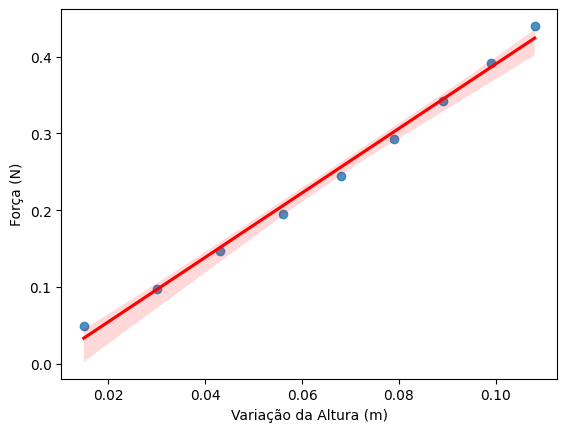

In [125]:
# Regressão Linear & Gráfico

forces_array = np.array(forces)
heights_array = np.array(height_decreases)
forces_array = np.array(forces).reshape(-1, 1)

forces_train, forces_test, heights_train, heights_test = train_test_split(forces_array, heights_array, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(forces_train, heights_train)
heights_pred = model.predict(forces_test)
mse = mean_squared_error(heights_test, heights_pred)

coefficient = round(model.coef_[0], 4)
intercept = round(model.intercept_, 4)

print(f"Erro quadrático médio: {mse}")
print(f"Intercepto em Y (B): {intercept}")
print(f"Coeficiente (A): {coefficient}")
print(f"Equação aproximada para a reta: ({coefficient})*y + {intercept}")


sns.regplot(x = heights_array, y = forces_array, line_kws={'color': 'red'})
plt.xlabel('Variação da Altura (m)')
plt.ylabel('Força (N)')
plt.show()